In this notebook, you will get familiar with the application of filtering techniques in Python. One common approach to apply filters on signals is to use [`scipy.signal.butter`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html#scipy.signal.butter) and [`scipy.signal.filtfilt`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.filtfilt.html). The examples used in this notebook are modified from this [page](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html#scipy.signal.butter).

In [3]:
# Run some setup code for this notebook
import numpy as np
from scipy.signal import butter, filtfilt

import matplotlib.pyplot as plt

First, create two sinusoid waves composed of 5 Hz and 15 Hz, respectively. Frequency, in this context, represents how frequently a periodic waveform or signal repeats at a specific amplitude. By this definition, the sinusoidal wave with a frequency of 15 Hz will exhibit more cycles within a given time period compared to the 5 Hz wave. Adding the two sinusoid waves together will produce the signal for the filtering experiments in this notebook. The visualizations below provide an insight into the characteristics of each signal.

In [4]:
sample_freq = 1000 # Sample 1000 data points in 1 second, resulting in sampling frequency being 1kHz
t = np.linspace(0, 1, sample_freq, False)
sig1 = np.sin(2*np.pi*5*t) # Create a sinusoid wave of 5 Hz
sig2 = np.sin(2*np.pi*15*t) # Create a sinusoid wave of 15 Hz
sig = sig1 + sig2 # Add two sinusoid waves together

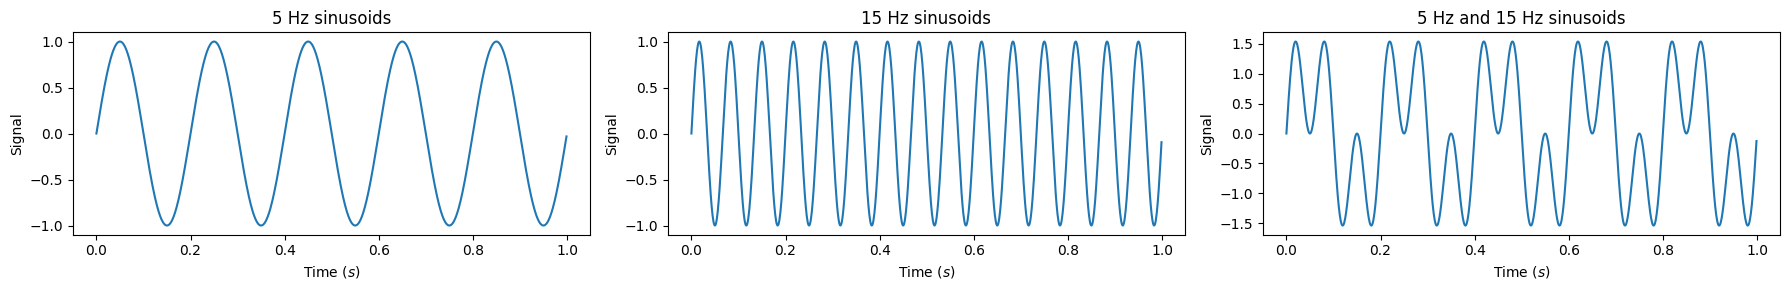

In [6]:
# Visualize the signals
n_rows = 1
n_cols = 3
row_sz = 3
col_sz = 6
fig = plt.figure(figsize=(n_cols*col_sz, n_rows*row_sz))
ax = fig.add_subplot(n_rows, n_cols, 1)
ax.plot(t, sig1)
ax.set_xlabel('Time ($s$)')
ax.set_ylabel('Signal')
ax.set_title('5 Hz sinusoids')

ax = fig.add_subplot(n_rows, n_cols, 2)
ax.plot(t, sig2)
ax.set_xlabel('Time ($s$)')
ax.set_ylabel('Signal')
ax.set_title('15 Hz sinusoids')

ax = fig.add_subplot(n_rows, n_cols, 3)
ax.plot(t, sig)
ax.set_xlabel('Time ($s$)')
ax.set_ylabel('Signal')
ax.set_title('5 Hz and 15 Hz sinusoids')
fig.tight_layout()
plt.show()

# Low-Pass Filter

A low-pass filter allows signals with a frequency lower than a specified cutoff frequency to pass through, while attenuating signals with frequencies higher than the cutoff frequency. You can define a 6-th order Butterworth low-pass filter with cut-off frequency of 10 Hz using `scipy.signal.butter`. 

In [7]:
# Define filter parameters
order = 6 # Filter order. Larger orders have a stronger filtering effect.
low_cutoff = 10 # Cut-off frequency in Hz

# Design Butterworth low-pass filter
b, a = butter(order, low_cutoff / (sample_freq / 2), btype='lowpass')

# 'b' and 'a' are the numerator and denominator coefficients of the filter transfer function

Apply the Butterworth low-pass filter on `sig`.

In [8]:
low_pass_sig = filtfilt(b, a, sig)

The cut-off frequency of 10 Hz in the defined low-pass filter implies that only sinusoidal waves with a frequency of 10 Hz or lower will be allowed to pass through the filter, while higher frequencies will be attenuated. The visualization below can be use to confirm this effect.

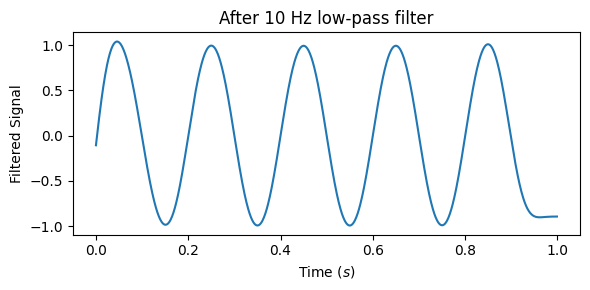

In [9]:
# Visualize the filtered signal
row_sz = 3
col_sz = 6
fig = plt.figure(figsize=(col_sz, row_sz))
ax = fig.add_subplot(111)
ax.plot(t, low_pass_sig)
ax.set_xlabel('Time ($s$)')
ax.set_ylabel('Filtered Signal')
ax.set_title('After 10 Hz low-pass filter')
fig.tight_layout()
plt.show()

# High-Pass Filter

A high-pass filter allows signals with a frequency higher than a specified cutoff frequency to pass through, while attenuating signals with frequencies lower than the cutoff frequency. You can define a 6-th order Butterworth high-pass filter with cut-off frequency of 10 Hz using `scipy.signal.butter`. 

In [10]:
# Define filter parameters
order = 6 # Filter order
high_cutoff = 10 # Cut-off frequency in Hz

# Design Butterworth high-pass filter
b, a = butter(order, high_cutoff / (sample_freq / 2), btype='highpass')

Apply the Butterworth high-pass filter on `sig`

In [11]:
high_pass_sig = filtfilt(b, a, sig)

The cut-off frequency of 10 Hz in the defined high-pass filter implies that only sinusoidal waves with a frequency of 10 Hz or higher will be allowed to pass through the filter, while lower frequencies will be attenuated. The visualization below can be use to confirm this effect.

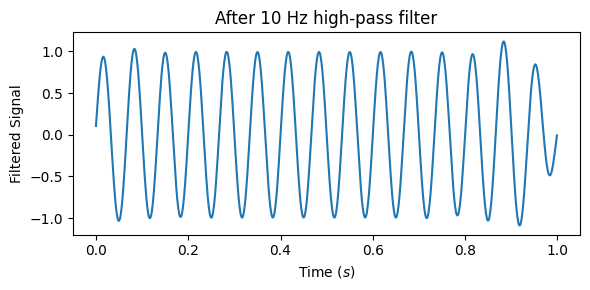

In [12]:
# Visualize the filtered signal
row_sz = 3
col_sz = 6
fig = plt.figure(figsize=(col_sz, row_sz))
ax = fig.add_subplot(111)
ax.plot(t, high_pass_sig)
ax.set_xlabel('Time ($s$)')
ax.set_ylabel('Filtered Signal')
ax.set_title('After 10 Hz high-pass filter')
fig.tight_layout()
plt.show()

# Band-Pass Filter

A band-pass filter allows signals within a specified frequency range, defined by cutoff frequencies, to pass through while attenuating frequencies outside this range. Here's an example of defining a band-pass filter with cutoff frequencies of 1 Hz and 10 Hz using `scipy.signal.butter`:

In [13]:
# Define filter parameters
order = 4  # Filter order
low_cutoff = 1  # Lower cutoff frequency in Hz
high_cutoff = 10  # Upper cutoff frequency in Hz

# Design Butterworth band-pass filter
b, a = butter(order, [low_cutoff / (sample_freq / 2), high_cutoff / (sample_freq / 2)], btype='bandpass')

# 'b' and 'a' are the numerator and denominator coefficients of the filter transfer function

Apply the Butterworth band-pass filter on `sig`, and the filtered signal is shown below.

In [14]:
band_pass_sig = filtfilt(b, a, sig)

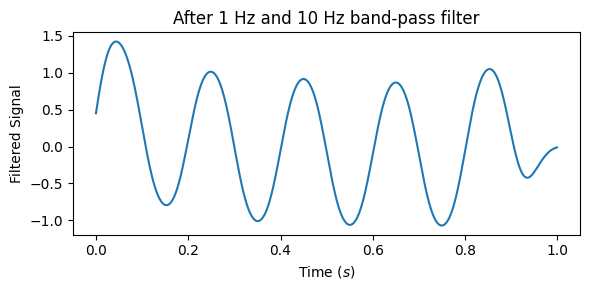

In [15]:
# Visualize the filtered signal
row_sz = 3
col_sz = 6
fig = plt.figure(figsize=(col_sz, row_sz))
ax = fig.add_subplot(111)
ax.plot(t, band_pass_sig)
ax.set_xlabel('Time ($s$)')
ax.set_ylabel('Filtered Signal')
ax.set_title('After 1 Hz and 10 Hz band-pass filter')
fig.tight_layout()
plt.show()